In [1]:
!pip install plotly
!pip install kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import kaleido

In [3]:
# Load and read the Excel data
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtlus/0 - A_Database and methodology_PhD/PlasticFADE.xlsx"
sheet_name = "Sankey"
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols='K', skiprows=1)
values = df.iloc[:, 0].tolist()  # Convert the column data to a list of values
pd.set_option('display.float_format', '{:.3f}'.format)  # Display all floats in 3 decimal digits

df_PP_TopS = df.iloc[0:9]
df_PP_WSur = df.iloc[9:18]
df_PS_TopS = df.iloc[18:27]
df_PS_WSur = df.iloc[27:36]
print(df_PP_TopS, "\n", df_PP_WSur, "\n", df_PS_TopS, "\n", df_PS_WSur)

   Value [kg].1
0        24.393
1         0.166
2        75.442
3         5.950
4         0.040
5        18.402
6         0.041
7         0.125
8        75.442 
     Value [kg].1
9         27.141
10        10.498
11        62.361
12         7.366
13         2.849
14        16.925
15         3.951
16         6.547
17        62.361 
     Value [kg].1
18        18.869
19         0.007
20        81.124
21         3.560
22         0.001
23        15.307
24         0.001
25         0.005
26        81.124 
     Value [kg].1
27        52.668
28        29.578
29        17.754
30        27.739
31        15.578
32         9.351
33        24.327
34         5.251
35        17.754


[ 3.641  3.184 93.175  0.133  0.116  3.393  0.217  2.966 93.175]


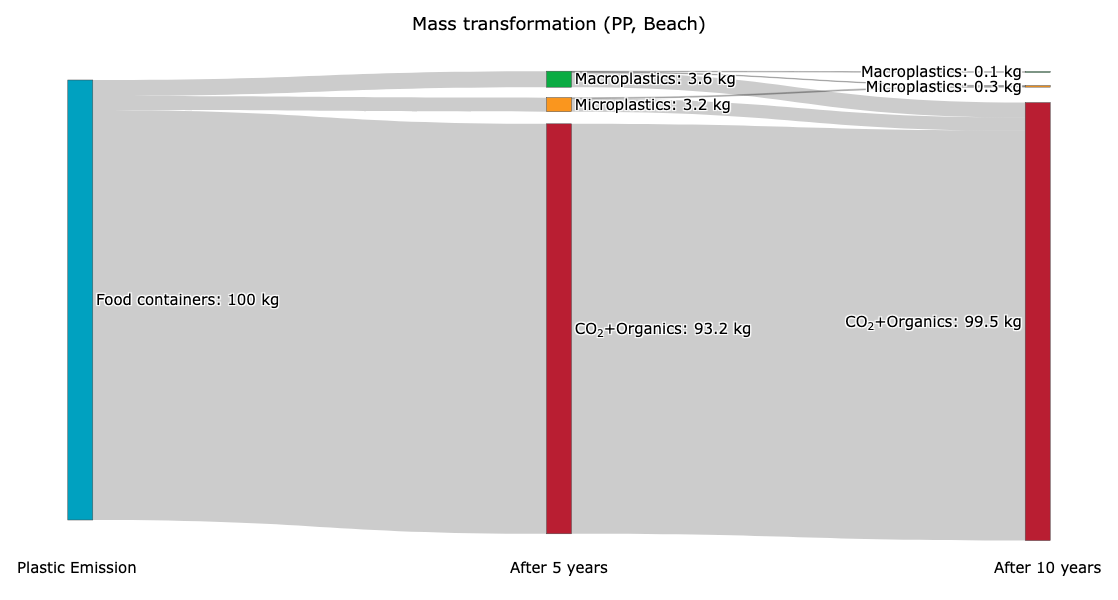

In [61]:
# Sankey diagram for PP, Topsoil
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 3.6 kg", "Microplastics: 3.2 kg", "CO<sub>2</sub>+Organics: 93.2 kg", 
               "Macroplastics: 0.1 kg", "Microplastics: 0.3 kg", "CO<sub>2</sub>+Organics: 99.5 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PP_TopS.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.04, 0.093, 0.56, 0.025, 0.055, 0.545]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PP_TopS     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PP, Topsoil)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=600,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PP_TopS.png", width=920, height=600, scale=6)
fig.show()

[11.954  1.088 86.958  1.429  0.13  10.395  0.142  0.946 86.958]


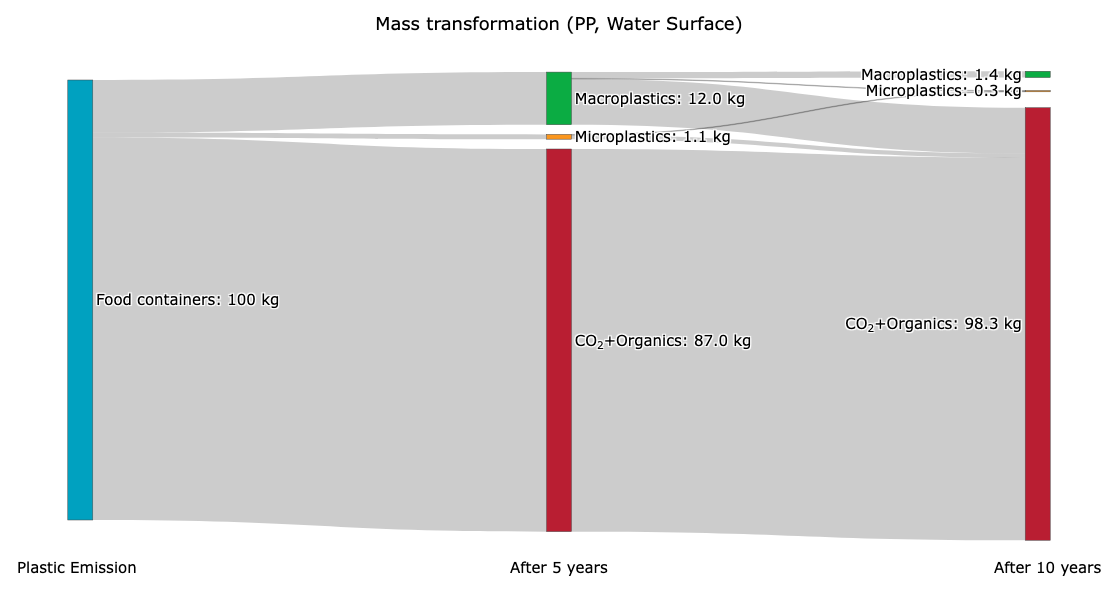

In [112]:
# Sankey diagram for PP, Water Surface
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 12.0 kg", "Microplastics: 1.1 kg", "CO<sub>2</sub>+Organics: 87.0 kg", 
               "Macroplastics: 1.4 kg", "Microplastics: 0.3 kg", "CO<sub>2</sub>+Organics: 98.3 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PP_WSur.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.08, 0.16, 0.584, 0.03, 0.065, 0.55]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PP_WSur     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PP, Water Surface)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=600,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PP_WSur.png", width=920, height=600, scale=6)
fig.show()

[18.869  0.007 81.124  3.56   0.001 15.307  0.001  0.005 81.124]


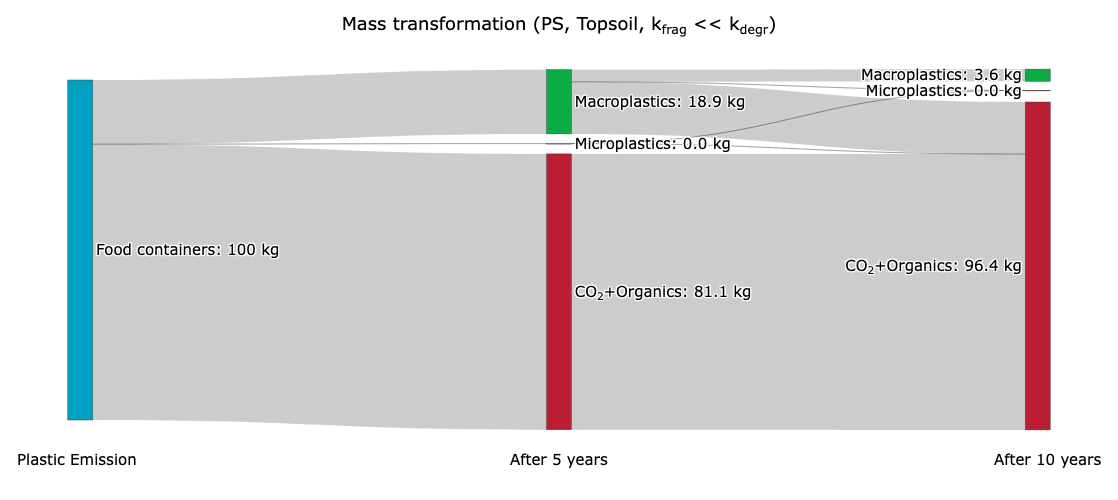

In [85]:
# Sankey diagram for PS, Topsoil
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 18.9 kg", "Microplastics: 0.0 kg", "CO<sub>2</sub>+Organics: 81.1 kg", 
               "Macroplastics: 3.6 kg", "Microplastics: 0.0 kg", "CO<sub>2</sub>+Organics: 96.4 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PS_TopS.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.11, 0.22, 0.61, 0.04, 0.08, 0.542]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PS_TopS     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PS, Topsoil, k<sub>frag</sub> << k<sub>degr</sub>)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=500,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PS_Topsoil.png", width=1000, height=500, scale=6)
fig.show()

[52.668 29.578 17.754 27.739 15.578  9.351 24.327  5.251 17.754]


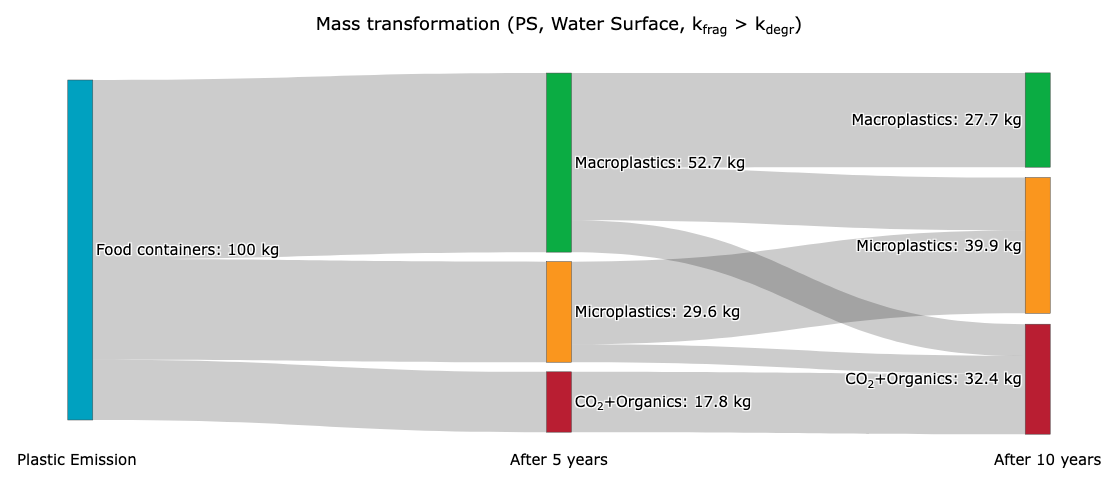

In [87]:
# Sankey diagram for PS, Water Surface
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 52.7 kg", "Microplastics: 29.6 kg", "CO<sub>2</sub>+Organics: 17.8 kg", 
               "Macroplastics: 27.7 kg", "Microplastics: 39.9 kg", "CO<sub>2</sub>+Organics: 32.4 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PS_WSur.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.27, 0.663, 0.9, 0.158, 0.488, 0.84]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PS_WSur     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=15),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PS, Water Surface, k<sub>frag</sub> > k<sub>degr</sub>)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=500,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PS_WSur.png", width=1000, height=500, scale=6)
fig.show()